# ML 101
Any ML project consists of the following steps:

## Data Collection
- Data competition websites, (kaggle)
- Data repositories,
- Databases and
- Web Scraping.

## Data Analysis/Exploration

- Exploratory plotting,
- Examining basic statistics and
- Data manipulation with `pandas` and `numpy`.

## Data Cleaning and preprocessing

- Cleaning data files,
- Inputing missing values,
- Creating new columns from existing columns
- Splitting the data into train_set, test_set and validation_set

## Choosing a model
- Supervised/Unsupervised learning
- Simple models like regression/classifier
- More complex models like neural nets
- Bias/variance trade off
- Choosing an appropriate metric

# The code
sklearn has made writing an ML code easier than ever. Here we will build two different models to classify handwritten characters into their respective number categories, namely:
- k-Nearest neighbor algorithm
- Multi-layer classifier neural net

# MNIST data set

In [5]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt

## `sklearn` version

sklearn has many useful functions pre-defined for learning ML. The `sklearn` version of this data set is a small sample of the original data with lower resolution images. This version of MNIST data contains 1797 8x8 (64 features) images with each pixel ranging from [0,255].

In [27]:
from sklearn.datasets import load_digits

In [7]:
X,y = load_digits(return_X_y=True)
X = X/255


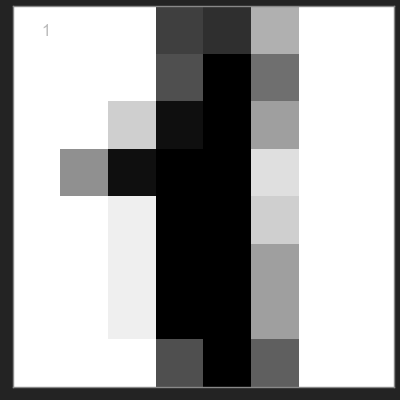

In [8]:
plt.imshow(X[1,:].reshape(8,8), cmap='gray_r')
plt.text(.1,.1,str(y[1]),fontsize=16)
plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=124,
                                                       stratify=y)

In [10]:
X_train_train, X_val, y_train_train, y_val = train_test_split(X_train, y_train,
                                                                 test_size=.2,
                                                                   shuffle=True,
                                                                   random_state=41,
                                                                   stratify=y_train)

# The $k$ -Nearest Neighbor algorithm

The way that $k$ NN makes predictions from the training set is pretty straightforward.
- You input a point you would like to predict on, $X^*$,
- It finds the $k$ closest points to $X^*$ in the training set, these are called $X^*$'s nearest neighbors,
- The categories of each of the nearest neighbors are tabulated and
- The category that recieves the most <i>votes</i> is what is predicted for $X^*$,
    - If there is a tie between two or more categories, the prediction is chosen at random from the tied classes.
    

## $k$ NN in `sklearn`

$k$ NN can be implemented in `sklearn` with `KNeighborsClassifier`, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html</a>.

We will now build a $k$ NN classifier using this model object, with $k=5$. 

In [11]:
## import here
from sklearn.neighbors import KNeighborsClassifier

In [26]:
## make the model object
knn = KNeighborsClassifier(5)

## "fit" the model object (Note fit is in quotation marks because this algorithm actually has no fitting step!).
knn.fit(X_train_train,y_train_train)


KNeighborsClassifier()

In [21]:
## predict
pred_train = knn.predict(X_train_train)
pred = knn.predict(X_val)
pred[1]

9

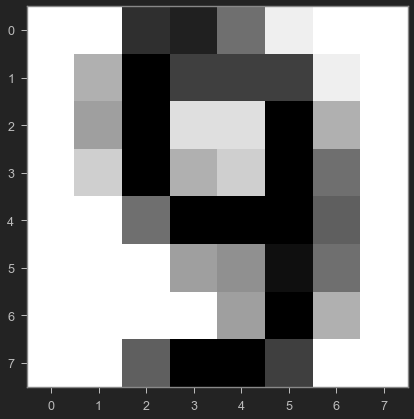

In [20]:
plt.imshow(X_val[1].reshape(8,8),cmap='gray_r')

In [30]:
## predict_proba
knn.predict_proba([X_val[5]])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

##### How to measure classification performance?

There are many ways! Perhaps the most common, or default approach is to use <i>accuracy</i>. Accuracy measures the proportion of all predictions made that are correct.

In [31]:
from sklearn.metrics import accuracy_score #(truth==predicted)/len(predicted)

In [32]:
## Get the validation accuracy for our model here
print("Our k-NN model has a training accuracy of",
         np.round(100*accuracy_score(y_train_train, knn.predict(X_train_train)),2))

print("Our k-NN model has a validation accuracy of",
         np.round(100*accuracy_score(y_val, knn.predict(X_val)),2))


Our k-NN model has a training accuracy of 99.04
Our k-NN model has a validation accuracy of 99.31


# NeuralNets

In [35]:
## import the model
from sklearn.neural_network import MLPClassifier

In [36]:
## this makes an mlp classifier with 1 hidden layer
## this layer has 500 nodes, controlled by hidden_layer_sizes
## we increase the maximum iterations for the gradient descent
mlp1 = MLPClassifier(hidden_layer_sizes=(500,), max_iter=5000)

## Here's a second classifier with 2 hidden layers of 200 nodes each,
## controlled by hidden_layer_sizes
## we increase the maximum iterations for the gradient descent
mlp2 = MLPClassifier(hidden_layer_sizes=(250, 250,), max_iter=5000)

In [37]:
## Fit the two classifiers
mlp1.fit(X_train_train, y_train_train)
mlp2.fit(X_train_train, y_train_train)

MLPClassifier(hidden_layer_sizes=(250, 250), max_iter=5000)

Let's now check the accuracies for these two models.

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
print("The single hidden layer with 500 nodes has a training accuracy of",
         np.round(100*accuracy_score(y_train_train, mlp1.predict(X_train_train)),2))

print("The single hidden layer with 500 nodes has a validation accuracy of",
         np.round(100*accuracy_score(y_val, mlp1.predict(X_val)),2))

print("The two hidden layers with 200 nodes each has a training accuracy of",
         np.round(100*accuracy_score(y_train_train, mlp2.predict(X_train_train)),2))

print("The two hidden layers with 200 nodes each has a validation accuracy of",
         np.round(100*accuracy_score(y_val, mlp2.predict(X_val)),2))

The single hidden layer with 500 nodes has a training accuracy of 100.0
The single hidden layer with 500 nodes has a validation accuracy of 96.53
The two hidden layers with 200 nodes each has a training accuracy of 100.0
The two hidden layers with 200 nodes each has a validation accuracy of 95.49


What architecture works best for you depends upon the problem you are dealing with. Typically you will have to do some sort of tuning process to find the <i>optimal</i> architecture.